# 1. Problem Statement
 
1. What is the problem that you are trying to solve?
   
   **Answer**: The problem is regarding **Fraud detection** on credit card transactions.
   
   
2. What kind of prediction (classification / regression) task are you performing?

   **Answer**: This is a binary classification task

### Installing libraries

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import opendatasets as od
import os

import warnings
warnings.filterwarnings('ignore')

# 2. Data Acquisition

## 2.1 Download the data directly

The dataset has been downloaded from Kaggle website : **https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset**.

In [2]:
dataset = r"https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset"

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\fraud-transactions-dataset" (use force=True to force download)


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [4]:
data_dir = r'.\fraud-transactions-dataset'

In [6]:
os.listdir(data_dir)

['fraudTest.csv', 'fraudTrain.csv']

Reading the dataset using pandas

In [8]:
df_fraudTrain = pd.read_csv(r"C:\Users\Venkat\fraud-transactions-dataset\fraudTrain.csv", index_col=0)

In [8]:
df_fraudTrain.shape

(1296675, 22)

In [9]:
df_fraudTest = pd.read_csv(r"C:\Users\Venkat\fraud-transactions-dataset\fraudTest.csv", index_col=0)

In [10]:
df_fraudTest.shape

(555719, 22)

The training dataset is very huge in comparison to the test dataset and thus working on the the training dataset will consume a lot of time for data cleaning and model training purpose. So we can consider **fraudTest.csv** for the problem scenario

## 2.3 Observations from the above dataframe

In [11]:
df_fraudTest.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#### Shape of the dataframe

In [12]:
df_fraudTest.shape

(555719, 22)

The dataframe consists of **555719** rows and **22** columns

#### Description of the attributes of the dataframe

trans_date_trans_time: The date and time of the transaction.

cc_num: credit card number.

merchant: Merchant who was getting paid.

category: In what area does that merchant deal.

amt: Amount of money in American Dollars.

first: first name of the card holder.

last: last name of the card holder.

gender: Gender of the cardholder.Just male and female!

street:Street of card holder residence

city:city of card holder residence

state:state of card holder residence

zip:ZIP code of card holder residence

lat:latitude of card holder

long:longitude of card holder

city_pop:Population of the city

job:trade of the card holder

dob:Date of birth of the card holder

trans_num: Transaction ID

unix_time: Unix time which is the time calculated since 1970 to today.

merch_lat: latitude of the merchant

merch_long:longitude of the merchant

is_fraud: Whether the transaction is fraud(1) or not(0)

In [13]:
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

### Data Preprocessing and Exploratory Data Analysis

#### Dropping irrelevant features

Based on domain knowledge, the attributes that will not be useful for fraud detection are :

 - trans_date_trans_time
 - cc_num
 - first
 - last
 - street
 - dob
 - zip
 - lat
 - long
 - trans_num
 - unix_time
 - merchant
 - city
 - job
 
 These attributes can be dropped 

In [14]:
df_fraudTest = df_fraudTest.drop(columns=["trans_date_trans_time", "cc_num", "first", "last", "street", "dob", "zip", "lat", "long", "trans_num", "unix_time", "merchant", "city", "job"], axis=1)

In [15]:
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   state       555719 non-null  object 
 4   city_pop    555719 non-null  int64  
 5   merch_lat   555719 non-null  float64
 6   merch_long  555719 non-null  float64
 7   is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 38.2+ MB


It can be observed that the irrelevant features have been dropped

#### Checking for duplicate rows

In [16]:
df_fraudTest.duplicated().sum()

0

There are no duplicate rows in the dataframe

Value count for feature is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

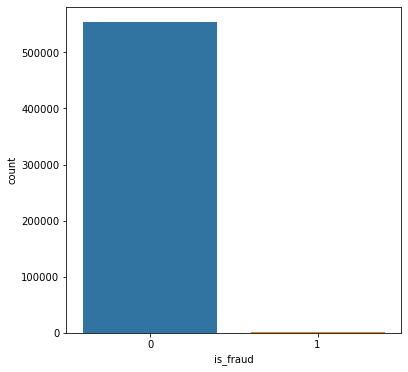

In [17]:
plt.figure(figsize=(6,6))
print("Value count for feature is_fraud")
print(df_fraudTest['is_fraud'].value_counts())
sns.countplot('is_fraud', data=df_fraudTest)

It can be observe that the dataframe is highly imbalanced. There are **553574** counts of genuine transactions whereas **2145** counts for fraud transactions. The dataset will need to be balanced

Value count for feature gender
F    304886
M    250833
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

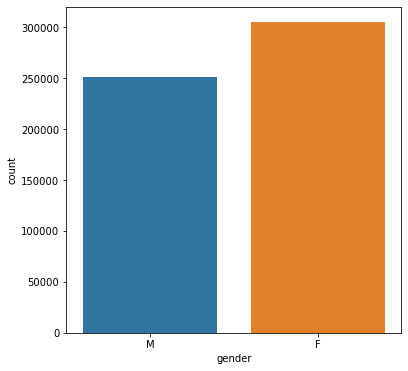

In [18]:
plt.figure(figsize=(6,6))
print("Value count for feature gender")
print(df_fraudTest['gender'].value_counts())
sns.countplot('gender', data=df_fraudTest)

It can be observed that there are **304886** females whereas **250833** males

#### Data Leakage and train test split

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

The indices of the dataframe will have to be reset

In [19]:
df_fraudTest.reset_index(inplace = True, drop = True)

In [20]:
df_fraudTest.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,SC,333497,33.986391,-81.200714,0
1,personal_care,29.84,F,UT,302,39.450498,-109.960431,0
2,health_fitness,41.28,F,NY,34496,40.495810,-74.196111,0
3,misc_pos,60.05,M,FL,54767,28.812398,-80.883061,0
4,travel,3.19,M,MI,1126,44.959148,-85.884734,0


#### Splitting the dataset into training and testing datasets

Separating the independent variables and the dependent variable

In [21]:
X = df_fraudTest.drop(columns=["is_fraud"], axis=1)
Y = df_fraudTest.is_fraud

Performing **train test split** using **scikit learn** module

In [22]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42, shuffle=True)

Checking the shape of the training and testing dataframes

In [23]:
X_train.shape

(277859, 7)

In [24]:
X_test.shape

(277860, 7)

In [25]:
y_train.shape

(277859,)

In [26]:
y_test.shape

(277860,)

Joining the training dataframe

In [27]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [28]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [29]:
df_train.reset_index(inplace = True, drop = True)

In [30]:
df_test.reset_index(inplace = True, drop = True)

In [31]:
df_test.to_csv("Fraud detection test.csv")

Now we will clean the training dataset

Checking if there is any missing value in the dataset

In [32]:
df_train.isnull().sum()

category      0
amt           0
gender        0
state         0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

It can be observed there are no missing values in the training dataset

In [33]:
df_train.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,home,6.80,M,MD,626,39.752861,-78.727874,0
1,gas_transport,61.74,M,OR,841711,45.341148,-123.117822,0
2,shopping_pos,1501.30,F,WV,16183,39.324516,-81.006573,0
3,food_dining,1.90,F,MD,313,37.554991,-75.473321,0
4,entertainment,66.09,F,TX,1563,32.554119,-96.383418,0


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277859 entries, 0 to 277858
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    277859 non-null  object 
 1   amt         277859 non-null  float64
 2   gender      277859 non-null  object 
 3   state       277859 non-null  object 
 4   city_pop    277859 non-null  int64  
 5   merch_lat   277859 non-null  float64
 6   merch_long  277859 non-null  float64
 7   is_fraud    277859 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 17.0+ MB


It can be observed that there are **277859** rows in the training dataset

#### Extracting the continuous features from the data

In [35]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['merch_lat', 'merch_long', 'is_fraud']]

In [36]:
continuous_features

['amt', 'city_pop']

#### Plotting Boxplots to identify Univariate outliers

In [37]:
def create_boxplots(dataset, feature_list, target):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset[target], y=dataset[feature], data=dataset, hue=target, color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

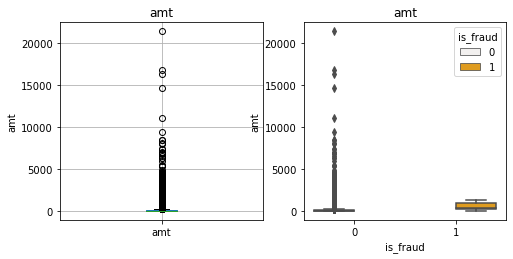

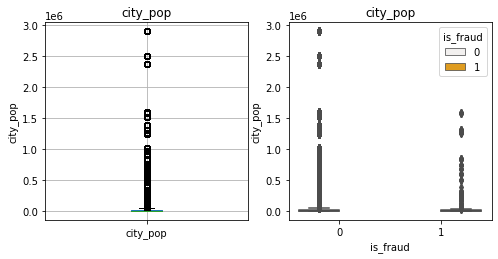

In [38]:
create_boxplots(df_train, continuous_features, 'is_fraud')

From the boxplots, it can be observed that the above continuous features have univariate outliers

#### Plotting histograms and distplots to check the distributions of continuous variables

In [39]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

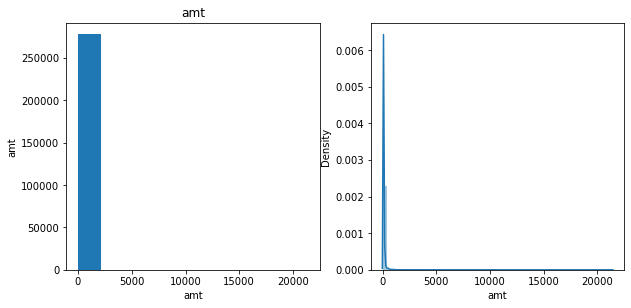

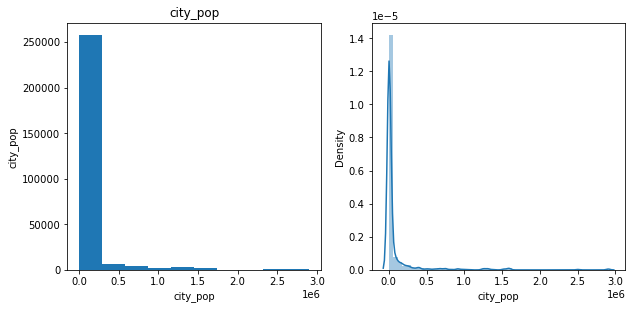

In [40]:
create_histograms_distplots(df_train, continuous_features)

From the above histograms and distplots, it can be observed that the above continuous features have skewness

#### Plotting a Heatmap for correlation analysis

<AxesSubplot:>

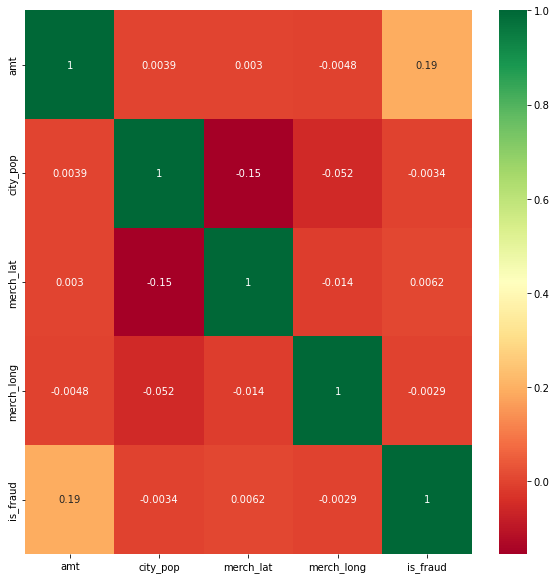

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

#### Creating Pivot table

In [42]:
pd.pivot_table(df_train, index='is_fraud', values=['amt', 'city_pop', 'merch_lat', 'merch_long'], aggfunc=['median'])

median                               
             amt city_pop  merch_lat merch_long
is_fraud                                       
0          47.01     2408  39.360680 -87.465025
1         382.18     3289  39.865905 -88.077309

It can be observed that fraud transactions correspond to a much higher median **amt(amount)** and **city_pop(city population)**. This implies that when the trnsaction amount is high, it is more likely for the transaction to be fraudulent

In [43]:
pd.pivot_table(df_train, index='gender', values=['amt', 'city_pop', 'merch_lat', 'merch_long'], aggfunc='median')

,amt,city_pop,merch_lat,merch_long
gender,,,,
F,43.16,2211,39.139656,-88.551806
M,51.32,2916,39.624762,-86.605122


It can be observed that males correspond to a higher median **amt(transaction amount)** and comprise a higher **city_pop(city population)**. This implies that males spend more and there are more number of males in the considered geographical area

In [44]:
df_train.groupby(['is_fraud', 'gender'])[['gender']].count().sort_values(['is_fraud']).rename(columns={'gender':'Count of males/females'})

Count of males/females
is_fraud gender                        
0        F                       152096
         M                       124700
1        F                          592
         M                          471

The above table shows the count of males/females for genuine and fraudulent transactions

<AxesSubplot:xlabel='is_fraud,gender'>

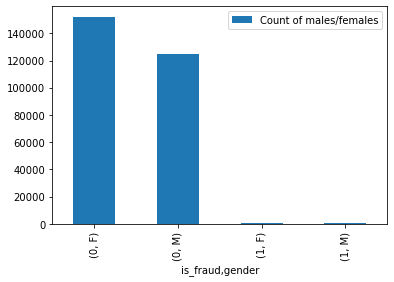

In [45]:
df_train.groupby(['is_fraud', 'gender'])[['gender']].count().sort_values(['is_fraud']).rename(columns={'gender':'Count of males/females'}).plot(kind='bar')

The above bar chart shows that there is higher count of females than males for genuine transactions. For fraudulent transactions, the number of males and females are approximately the same

In [46]:
df_train.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,home,6.80,M,MD,626,39.752861,-78.727874,0
1,gas_transport,61.74,M,OR,841711,45.341148,-123.117822,0
2,shopping_pos,1501.30,F,WV,16183,39.324516,-81.006573,0
3,food_dining,1.90,F,MD,313,37.554991,-75.473321,0
4,entertainment,66.09,F,TX,1563,32.554119,-96.383418,0


In [47]:
df_train.groupby(['is_fraud', 'category'])[['category']].count().sort_values(['is_fraud']).rename(columns={'category':'Count of merchants'})

Count of merchants
is_fraud category                          
0        entertainment                19918
         shopping_pos                 24790
         shopping_net                 20503
         personal_care                19681
         misc_pos                     17351
         misc_net                     13593
         kids_pets                    24490
         travel                        8710
         health_fitness               18288
         grocery_pos                  25888
         grocery_net                   9643
         gas_transport                28170
         food_dining                  19688
         home                         26083
1        shopping_net                   256
         personal_care                   37
         misc_pos                        34
         misc_net                       129
         kids_pets                       33
         home                            30
         grocery_net                     16
         grocery_pos                    254
         gas_transport                   69
         food_dining                     23
         entertainment                   29
         shopping_pos                   106
         health_fitness                  26
         travel                          21

<AxesSubplot:xlabel='is_fraud,category'>

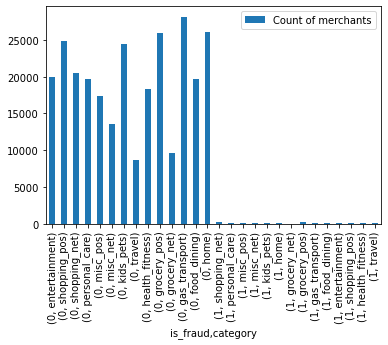

In [48]:
df_train.groupby(['is_fraud', 'category'])[['category']].count().sort_values(['is_fraud']).rename(columns={'category':'Count of merchants'}).plot(kind='bar')

#### Handling the outliers

In [49]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [50]:
remove_outliers(df_train, continuous_features)

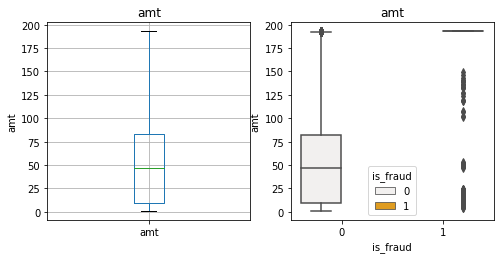

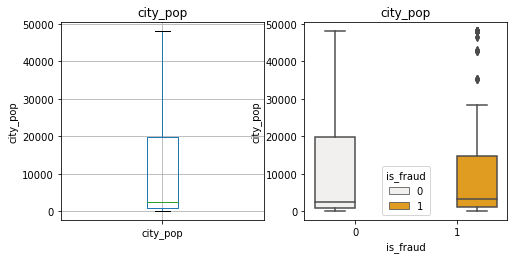

In [51]:
create_boxplots(df_train, continuous_features, 'is_fraud')

The univariate outliers have been treated

### Checking for skewness

Skewness scores to determine skewness in the column

In [52]:
from scipy.stats import skew

In [53]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    for feature in feature_list:
        variables.append(feature)
        skew_scores.append(skew(dataset[feature]))
        skew_dict = {'Feature': variables, 'Skewness Score': skew_scores}
        skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [54]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score
0,amt,1.059482
1,city_pop,1.185163


From the distplots and skewness scores, it can be observed that the feature columns **amt** and **city_pop** are considerably skewed. We will remove skewness by performing square root transformation

<AxesSubplot:xlabel='amt', ylabel='Density'>

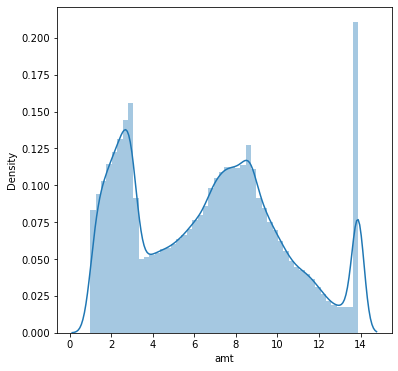

In [55]:
plt.figure(figsize=(6,6))
df_train['amt'] = np.sqrt(df_train['amt'])
sns.distplot(df_train['amt'])

<AxesSubplot:xlabel='city_pop', ylabel='Density'>

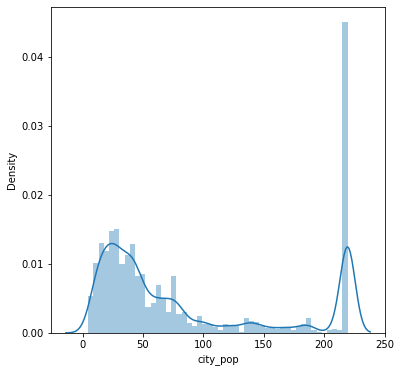

In [56]:
plt.figure(figsize=(6,6))
df_train['city_pop'] = np.sqrt(df_train['city_pop'])
sns.distplot(df_train['city_pop'])

The skewness has been handled

#### Separating the independent and dependent features in the training dataset

In [57]:
X = df_train.iloc[:,:-1]

In [58]:
Y = df_train.iloc[:,-1]

In [59]:
X.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long
0,home,2.607681,M,MD,25.019992,39.752861,-78.727874
1,gas_transport,7.857481,M,OR,219.319402,45.341148,-123.117822
2,shopping_pos,13.890644,F,WV,127.212421,39.324516,-81.006573
3,food_dining,1.378405,F,MD,17.691806,37.554991,-75.473321
4,entertainment,8.129576,F,TX,39.534795,32.554119,-96.383418


In [60]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

#### Encoding of categorical variables in the training dataset

In [61]:
categorical_features = [feature for feature in X.select_dtypes(np.object).columns]

In [62]:
categorical_features

['category', 'gender', 'state']

In [63]:
for col in categorical_features:
    print('Unique categories in the feature', col, ': ', X[col].nunique())

Unique categories in the feature category :  14
Unique categories in the feature gender :  2
Unique categories in the feature state :  50


It can be observed that the features **merchant**, **city**, **state** and **job** have too many categories. So for each of the features, we can consider the top 10 categories having higher counts than the remaining categories

In [64]:
def one_hot_top_10(dataset, variable):
    top_10 = [x for x in dataset[variable].value_counts().sort_values(ascending=False).head(10).index]
    
    for label in top_10:
        dataset[variable+'_'+label] = np.where(dataset[variable]==label,1,0)

In [65]:
one_hot_top_10(X, 'state')

In [66]:
X = X.drop(columns=["state"], axis=1)

In [67]:
X = pd.get_dummies(X, drop_first=True)

In [68]:
X.head(10)

,amt,city_pop,merch_lat,merch_long,state_TX,state_NY,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.607681,25.019992,39.752861,-78.727874,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,7.857481,219.319402,45.341148,-123.117822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.890644,127.212421,39.324516,-81.006573,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.378405,17.691806,37.554991,-75.473321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.129576,39.534795,32.554119,-96.383418,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5.384236,35.651087,43.217609,-76.838025,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7.584853,18.466185,39.523698,-81.733606,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
7,1.913113,219.319402,43.159532,-87.176356,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,8.742425,54.000000,44.822887,-93.043369,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,9.954898,8.774964,46.248864,-101.443055,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Handling imbalance in the data

In [69]:
print(Y.value_counts())

0    276796
1      1063
Name: is_fraud, dtype: int64


It can be observed that there is a huge imbalance in the target column **is_fraud** in the dataset

We will perform **oversampling** using **SMOTEtomek** technique

In [70]:
from imblearn.combine import SMOTETomek

In [71]:
os = SMOTETomek(random_state=42)

In [72]:
X_train, Y_train = os.fit_resample(X, Y)

In [73]:
from collections import Counter

In [74]:
print("Number of classes after fit {}".format(Counter(Y_train)))

Number of classes after fit Counter({0: 276788, 1: 276788})


Joining **X_train** and **Y_train** dataframes

In [75]:
df_train = X_train.join(Y_train, how='inner')

Value count for feature is_fraud
0    276788
1    276788
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

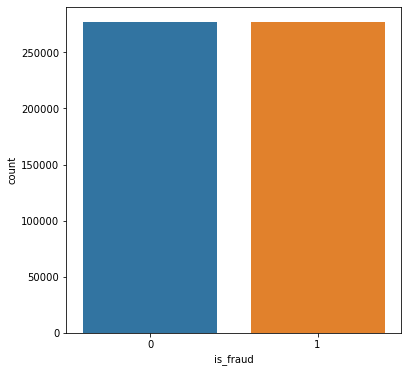

In [76]:
plt.figure(figsize=(6,6))
print("Value count for feature is_fraud")
print(df_train['is_fraud'].value_counts())
sns.countplot('is_fraud', data=df_train)

It can be observed that the dataset is quite balanced now

In [77]:
df_train.to_csv('Fraud detection train.csv')

In [78]:
df_train = pd.read_csv("Fraud detection train.csv", index_col=0)

#### Feature Selection in the training dataset

Feature Selection is performed to retain only the important features and discard the irrelevant features

In [79]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,state_TX,state_NY,state_PA,state_CA,state_OH,state_MI,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,2.607681,25.019992,39.752861,-78.727874,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,7.857481,219.319402,45.341148,-123.117822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13.890644,127.212421,39.324516,-81.006573,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.378405,17.691806,37.554991,-75.473321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.129576,39.534795,32.554119,-96.383418,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
X = df_train.iloc[:,:-1]

In [82]:
Y = df_train.iloc[:,-1]

In [83]:
bestfeatures = SelectKBest(score_func = chi2)

For fitting the data on the feature selection algorithm, we need to consider non-negative values of the data. So we can use **abs(absolute)** function to obtain the absolute positive value

In [84]:
X['merch_long'] = abs(X['merch_long'])

In [85]:
X['merch_lat'] = abs(X['merch_lat'])

In [86]:
fit = bestfeatures.fit(X, Y)

In [87]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [88]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [89]:
featureScores.columns = ['Features', 'Score']

In [90]:
featureScores.sort_values(by='Score', ascending=False)

,Features,Score
0,amt,400855.525348
19,category_home,24783.593455
20,category_kids_pets,20683.257590
14,category_food_dining,19619.107351
23,category_personal_care,16157.725165
18,category_health_fitness,14988.612337
15,category_gas_transport,14482.441562
22,category_misc_pos,14353.961975
25,category_shopping_pos,13335.501668
16,category_grocery_net,8006.517882


The features that have high scores are more correlated with the target variable.

The features **state_MO**, **category_grocery_pos**, **state_NY** and **state_FL** do not contribute much to the prediction of the target variable

#### Feature Importance

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

In [92]:
model = ExtraTreesClassifier()

In [93]:
model.fit(X,Y)

ExtraTreesClassifier()

In [94]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

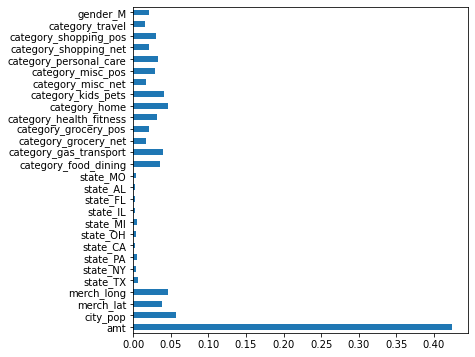

In [95]:
plt.figure(figsize=(6,6))
feat_importances.plot(kind='barh')
plt.show()

The above barplot displays the feature importance scores. From the above barplot, it can be observed that none of the states are important and thus can be removed from the dataset

In [96]:
df_train = df_train.drop(['state_FL', 'state_NY', 'state_MO'], axis = 1)

In [97]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,2.607681,25.019992,39.752861,-78.727874,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,7.857481,219.319402,45.341148,-123.117822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13.890644,127.212421,39.324516,-81.006573,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.378405,17.691806,37.554991,-75.473321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.129576,39.534795,32.554119,-96.383418,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_train.to_csv('Fraud detection train_featuresSelected.csv')

In [99]:
df_train = pd.read_csv("Fraud detection train_featuresSelected.csv", index_col=0)

#### Feature scaling

In [100]:
df_train.describe()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,...,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.0
mean,9.246426,86.078073,38.784934,-90.597202,0.051169,0.052667,0.040686,0.024208,0.025122,0.029134,...,0.047918,0.046705,0.036974,0.033302,0.037859,0.085226,0.053617,0.017681,0.400671,0.5
std,4.563692,73.817807,5.002378,14.199987,0.220343,0.223367,0.197563,0.153695,0.156496,0.168183,...,0.213592,0.211007,0.188698,0.179423,0.190856,0.279218,0.225260,0.131791,0.490035,0.5
min,1.000000,4.795832,19.027422,-166.671575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.619673,29.631065,34.963217,-97.231770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,9.603124,53.254108,39.597914,-87.948547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
75%,13.890644,130.564160,41.990381,-79.944798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,13.890644,219.319402,66.674714,-66.952352,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


It can be observed that there is different in the scales of respective continuous features. So we need to perform feature scaling. We can use **MinMaxScaler** to perform Min max normalization

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
std_scaler = MinMaxScaler()

In [103]:
std_scaler.fit(df_train)

MinMaxScaler()

In [104]:
df_train_scaled = std_scaler.transform(df_train)

In [105]:
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [106]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,0.124717,0.094275,0.434976,0.881913,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.531973,1.000000,0.552261,0.436764,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.570644,0.425986,0.859062,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.029355,0.060114,0.388848,0.914550,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.553081,0.161935,0.283892,0.704861,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_train.describe()

,amt,city_pop,merch_lat,merch_long,state_TX,state_PA,state_CA,state_OH,state_MI,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,...,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.000000,553576.0
mean,0.639722,0.378897,0.414662,0.762886,0.051169,0.052667,0.040686,0.024208,0.025122,0.029134,...,0.047918,0.046705,0.036974,0.033302,0.037859,0.085226,0.053617,0.017681,0.400671,0.5
std,0.354031,0.344101,0.104988,0.142400,0.220343,0.223367,0.197563,0.153695,0.156496,0.168183,...,0.213592,0.211007,0.188698,0.179423,0.190856,0.279218,0.225260,0.131791,0.490035,0.5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.280798,0.115769,0.334453,0.696353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.667393,0.225888,0.431724,0.789447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
75%,1.000000,0.586268,0.481936,0.869710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


It can be observed that the features have been scaled in the training dataset

In [108]:
df_train.to_csv("df_train_featuresScaled.csv")

In [109]:
df_train = pd.read_csv("df_train_featuresScaled.csv", index_col=0)

#### Performing feature engineering on the test dataset

In [110]:
df_test = pd.read_csv("Fraud detection test.csv", index_col=0)

In [111]:
df_test.head()

,category,amt,gender,state,city_pop,merch_lat,merch_long,is_fraud
0,shopping_pos,1.07,F,CT,5438,41.240083,-71.837788,0
1,kids_pets,94.99,M,OK,7163,35.156537,-95.806648,0
2,kids_pets,31.28,F,MO,602,39.888665,-93.106804,0
3,gas_transport,73.06,M,OK,7163,36.734101,-96.737345,0
4,misc_net,9.99,F,IA,2036,40.922072,-94.899388,0


Checking if there are any missing values in the test dataset

In [112]:
df_test.isnull().sum()

category      0
amt           0
gender        0
state         0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [113]:
df_test = df_test.dropna()

In [114]:
df_test.isnull().sum()

category      0
amt           0
gender        0
state         0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

The missing values in the test dataset have been dropped

#### Encoding of categorical variables in the training dataset

In [115]:
categorical_features = [feature for feature in df_test.select_dtypes(np.object).columns]

In [116]:
categorical_features

['category', 'gender', 'state']

In [117]:
for col in categorical_features:
    print('Unique categories in the feature', col, ': ', df_test[col].nunique())

Unique categories in the feature category :  14
Unique categories in the feature gender :  2
Unique categories in the feature state :  50


In [118]:
def one_hot_top_10(dataset, variable):
    top_10 = [x for x in dataset[variable].value_counts().sort_values(ascending=False).head(10).index]
    
    for label in top_10:
        dataset[variable+'_'+label] = np.where(dataset[variable]==label,1,0)

In [119]:
one_hot_top_10(df_test, 'state')

In [120]:
df_test = df_test.drop(columns=["state"], axis=1)

In [121]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [122]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_NY,state_PA,state_CA,state_OH,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,1.07,5438,41.240083,-71.837788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,94.99,7163,35.156537,-95.806648,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,31.28,602,39.888665,-93.106804,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,73.06,7163,36.734101,-96.737345,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.99,2036,40.922072,-94.899388,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Feature Selection and Feature scaling in the testing dataset

In [123]:
df_test = df_test.drop(['state_FL', 'state_NY', 'state_MO'], axis = 1)

In [124]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,1.07,5438,41.240083,-71.837788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,94.99,7163,35.156537,-95.806648,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,31.28,602,39.888665,-93.106804,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,73.06,7163,36.734101,-96.737345,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.99,2036,40.922072,-94.899388,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
df_test.describe()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,277860.000000,2.778600e+05,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,...,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000
mean,69.663882,8.814643e+04,38.549467,-90.212141,0.003894,0.072324,0.061383,0.042982,0.036709,0.035827,...,0.066076,0.094407,0.086983,0.049107,0.061862,0.070572,0.075650,0.089595,0.031376,0.452249
std,160.440865,2.997059e+05,5.100443,13.734059,0.062281,0.259024,0.240033,0.202817,0.188047,0.185860,...,0.248416,0.292395,0.281810,0.216093,0.240905,0.256108,0.264437,0.285602,0.174331,0.497716
min,1.000000,2.300000e+01,19.027849,-166.670006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.660000,7.410000e+02,34.770097,-96.875338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.420000,2.408000e+03,39.392480,-87.421527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.090000,1.968500e+04,41.961519,-80.270665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22768.110000,2.906700e+06,66.679297,-66.952026,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
df_test['merch_long'] = abs(df_test['merch_long'])

In [127]:
df_test['merch_lat'] = abs(df_test['merch_lat'])

In [128]:
df_test_scaled = std_scaler.transform(df_test)

In [129]:
df_test = pd.DataFrame(df_test_scaled, columns=df_test.columns)

In [130]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.005430,25.326840,0.466189,2.391809,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.291335,33.367915,0.338511,2.632173,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.348990,2.783863,0.437826,2.605098,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.590101,33.367915,0.371620,2.641506,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.697405,9.468443,0.459515,2.623075,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df_test.describe()

,amt,city_pop,merch_lat,merch_long,is_fraud,state_TX,state_PA,state_CA,state_OH,state_MI,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,...,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000,277860.000000
mean,5.326645,410.871571,0.409720,2.576070,0.003894,0.072324,0.061383,0.042982,0.036709,0.035827,...,0.066076,0.094407,0.086983,0.049107,0.061862,0.070572,0.075650,0.089595,0.031376,0.452249
std,12.446303,1397.076883,0.107046,0.137727,0.062281,0.259024,0.240033,0.202817,0.188047,0.185860,...,0.248416,0.292395,0.281810,0.216093,0.240905,0.256108,0.264437,0.285602,0.174331,0.497716
min,0.000000,0.084859,0.000009,2.342814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.671805,3.431810,0.330400,2.476375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.601061,11.202518,0.427413,2.548085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.368184,91.739123,0.481331,2.642890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1766.173157,13549.537706,1.000096,3.342802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The training and the test dataframes are ready for model training and testing purpose

In [132]:
df_test.to_csv("Test dataset processed.csv")

In [133]:
df_test = pd.read_csv("Test dataset processed.csv", index_col=0)

### Separating the target feature in the training and testing datasets

In [152]:
X_train = df_train.drop(columns=["is_fraud"], axis=1)
Y_train = df_train.is_fraud

In [153]:
X_test = df_test.drop(columns=["is_fraud"], axis=1)
Y_test = df_test.is_fraud

# 4. Deep Neural Network Architecture

#### Importing the keras libraries and packages

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.regularizers import l2

* Initiating the ANN

In [185]:
model = Sequential()
factor = 0

# input layer
model.add(Dense(500,  kernel_regularizer=l2(factor), activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(250, kernel_regularizer=l2(factor), activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(120, kernel_regularizer=l2(factor), activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(60, kernel_regularizer=l2(factor), activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(30, kernel_regularizer=l2(factor),activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam')

# Compiling the ANN
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
classifier_nn=model.fit(X_train,Y_train,
                          validation_split = 0.33,
                          epochs=10,
                          batch_size=256)

from tensorflow.keras.models import load_model
model.save('Fraud_Detect_ANN_model_final.h5') 

Epoch 1/10
1449/1449 [==============================] - 36s 24ms/step - loss: 0.1529 - accuracy: 0.9371 - val_loss: 0.1920 - val_accuracy: 0.9344
Epoch 2/10
1449/1449 [==============================] - 29s 20ms/step - loss: 0.1135 - accuracy: 0.9531 - val_loss: 0.1403 - val_accuracy: 0.9657
Epoch 3/10
1449/1449 [==============================] - 29s 20ms/step - loss: 0.1060 - accuracy: 0.9562 - val_loss: 0.1295 - val_accuracy: 0.9717
Epoch 4/10
1449/1449 [==============================] - 30s 20ms/step - loss: 0.1023 - accuracy: 0.9577 - val_loss: 0.1669 - val_accuracy: 0.9549
Epoch 5/10
1449/1449 [==============================] - 30s 21ms/step - loss: 0.0989 - accuracy: 0.9596 - val_loss: 0.1241 - val_accuracy: 0.9709
Epoch 6/10
1449/1449 [==============================] - 30s 20ms/step - loss: 0.0958 - accuracy: 0.9607 - val_loss: 0.1211 - val_accuracy: 0.9639
Epoch 7/10
1449/1449 [==============================] - 29s 20ms/step - loss: 0.0930 - accuracy: 0.9624 - val_loss: 0.1306 -

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [186]:
#Displaying the model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 500)               13000     
                                                                 
 dropout_52 (Dropout)        (None, 500)               0         
                                                                 
 dense_64 (Dense)            (None, 250)               125250    
                                                                 
 dropout_53 (Dropout)        (None, 250)               0         
                                                                 
 dense_65 (Dense)            (None, 120)               30120     
                                                                 
 dropout_54 (Dropout)        (None, 120)               0         
                                                                 
 dense_66 (Dense)            (None, 60)              

# 5. Training the model

## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

## 5.2 Train the model

# 6. Test the model

In [181]:
# Predict Labels
testLoss, testAccuracy = model.evaluate(X_test, Y_test, verbose=0)

# Predict Labels
Y_pred = model.predict(X_test)



TypeError: cannot unpack non-iterable float object

<AxesSubplot:>

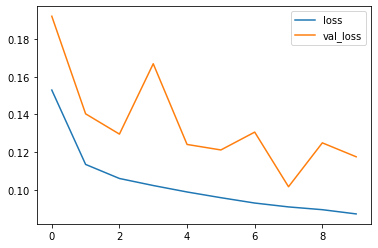

In [187]:
### losses function of train and test data, very low loss and no overfitting
losses = pd.DataFrame(classifier_nn.history)
losses[['loss','val_loss']].plot()

## 7.  Conclusion 

Plot the training and validation accuracy and loss report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

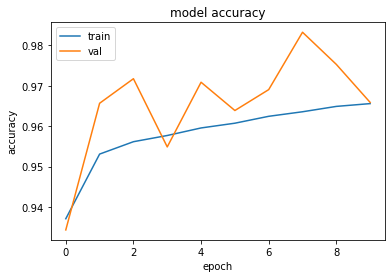

In [188]:
# summarize history for accuracy

import matplotlib.pyplot as plt

plt.plot(classifier_nn.history['accuracy'])
plt.plot(classifier_nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It can be observed that at the 10th epoch, the training and validation accuracy are nearly the same

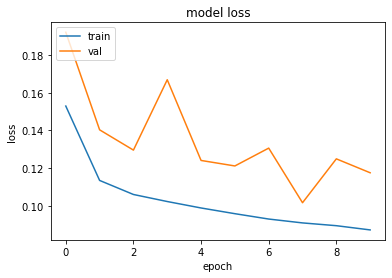

In [189]:
# summarize history for loss

import matplotlib.pyplot as plt

plt.plot(classifier_nn.history['loss'])
plt.plot(classifier_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It can be observed that the training and the validation loss have reduced with increase in the epochs

In [17]:
# Saving the model
model.save('Fraud_Detect_ANN_model.h5')

In [190]:
# Loading the model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('Fraud_Detect_ANN_model_final.h5')

#### Determining model accuracy

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred)*100))

accuracy score :  64.71712373137551


<AxesSubplot:>

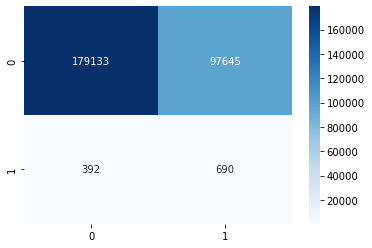

In [193]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True, cmap = 'Blues', fmt='g')

As per the confusion matrix, the false positives are high

In [194]:
# Classification Report    
print('Classfication report = \n', classification_report(Y_test, Y_pred, target_names=target_names))

NameError: name 'target_names' is not defined

The precision and recall scores are poor

### Alternative Way: Data Modelling - Random Forest

In [195]:
### split the data to train and test
from sklearn.model_selection import train_test_split
X = df.drop('is_fraud',axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

NameError: name 'df' is not defined

In [ ]:
### call random forest model to fit and predict
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators  = 300)

rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

# 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

